# Load the Data

In [1]:
import pandas as pd

# Load the Excel file
xls_file = pd.ExcelFile('world population data.xls')

# Read each sheet into a DataFrame
data_df = pd.read_excel(xls_file, sheet_name='Data')
countries_metadata_df = pd.read_excel(xls_file, sheet_name='Metadata - Countries')
indicators_metadata_df = pd.read_excel(xls_file, sheet_name='Metadata - Indicators')

data_df.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,Last Updated Date,2024-02-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
4,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0


In [2]:
countries_metadata_df.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola


In [3]:
indicators_metadata_df.head()

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION
0,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...


# Clean the Data

In [4]:
# Drop unnecessary rows and columns, from the data_df
data_df = data_df.drop([0, 1, 2]).reset_index(drop=True)

In [5]:
data_df.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0


In [6]:
# Step 1: Check for missing values
missing_values = data_df.isnull().sum()

# Step 2: Ensure all data types are appropriate
data_types = data_df.dtypes

# Display the results
missing_values, data_types

(Data Source                     0
 World Development Indicators    0
 Unnamed: 2                      0
 Unnamed: 3                      0
 Unnamed: 4                      2
                                ..
 Unnamed: 62                     1
 Unnamed: 63                     1
 Unnamed: 64                     1
 Unnamed: 65                     1
 Unnamed: 66                     1
 Length: 67, dtype: int64,
 Data Source                      object
 World Development Indicators     object
 Unnamed: 2                       object
 Unnamed: 3                       object
 Unnamed: 4                      float64
                                  ...   
 Unnamed: 62                     float64
 Unnamed: 63                     float64
 Unnamed: 64                     float64
 Unnamed: 65                     float64
 Unnamed: 66                     float64
 Length: 67, dtype: object)

In [8]:
# Print the column names to see the actual names
print(data_df.columns)

Index(['Data Source', 'World Development Indicators', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', '

In [9]:
print(data_df.head())

                   Data Source World Development Indicators  \
0                        Aruba                          ABW   
1  Africa Eastern and Southern                          AFE   
2                  Afghanistan                          AFG   
3   Africa Western and Central                          AFW   
4                       Angola                          AGO   

          Unnamed: 2   Unnamed: 3   Unnamed: 4   Unnamed: 5   Unnamed: 6  \
0  Population, total  SP.POP.TOTL      54608.0      55811.0      56682.0   
1  Population, total  SP.POP.TOTL  130692579.0  134169237.0  137835590.0   
2  Population, total  SP.POP.TOTL    8622466.0    8790140.0    8969047.0   
3  Population, total  SP.POP.TOTL   97256290.0   99314028.0  101445032.0   
4  Population, total  SP.POP.TOTL    5357195.0    5441333.0    5521400.0   

    Unnamed: 7   Unnamed: 8   Unnamed: 9  ...  Unnamed: 57  Unnamed: 58  \
0      57475.0      58178.0      58782.0  ...     102880.0     103594.0   
1  141630546.0

In [16]:
import pandas as pd

# Load the CSV file
file_path = 'Current-Well-being-by-age.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,LOCATION,Country,TYPE_VAR,Type of indicator,VARIABLE,Indicator,WB,Current/Future Well-being,SEX,Sex,AGE,Age,EDUCATION,Education,TIME,Time,Value,Flag Codes,Flags
0,AUS,Australia,HOR,Gap between groups (horizontal inequality),7_1,Social support,CWB,Current Well-being,TOT,Total population,YOUNG,Young,TOT,Total population,2010,2010,97.12308,NaN,NaN
1,AUS,Australia,HOR,Gap between groups (horizontal inequality),7_1,Social support,CWB,Current Well-being,TOT,Total population,YOUNG,Young,TOT,Total population,2013,2013,97.12308,NaN,NaN
2,AUS,Australia,HOR,Gap between groups (horizontal inequality),7_1,Social support,CWB,Current Well-being,TOT,Total population,YOUNG,Young,TOT,Total population,2014,2014,97.12308,NaN,NaN
3,AUS,Australia,HOR,Gap between groups (horizontal inequality),7_1,Social support,CWB,Current Well-being,TOT,Total population,YOUNG,Young,TOT,Total population,2019,2019,97.12308,NaN,NaN
4,AUS,Australia,HOR,Gap between groups (horizontal inequality),7_1,Social support,CWB,Current Well-being,TOT,Total population,YOUNG,Young,TOT,Total population,2021,2021,97.12308,NaN,NaN


In [17]:
# Checking the distribution of indicators, countries, and years before filtering.

# Check for the availability of data across different indicators
indicator_counts = data['Indicator'].value_counts()

# Check the range of years available in the dataset
year_range = data['Time'].unique()

# Check the number of countries represented
country_counts = data['Country'].unique().shape[0]

indicator_counts, year_range, country_counts

(Employment rate                             2208
 Long hours in paid work                     2020
 Long-term unemployment rate                 1943
 Perceived health                            1492
 Social support                              1452
 Feeling safe at night                       1446
 Negative affect balance                     1431
 Labour market insecurity                     927
 Life satisfaction                            318
 Job strain                                   285
 Satisfaction with time use                   168
 Satisfaction with personal relationships     162
 Having a say in government                   102
 Adult skills (numeracy)                      102
 Adult skills (literacy)                       99
 Self-reported depression                      98
 Voter turnout                                 72
 Time spent in social interactions             60
 Time off                                      42
 Name: Indicator, dtype: int64,
 array([2010, 2013

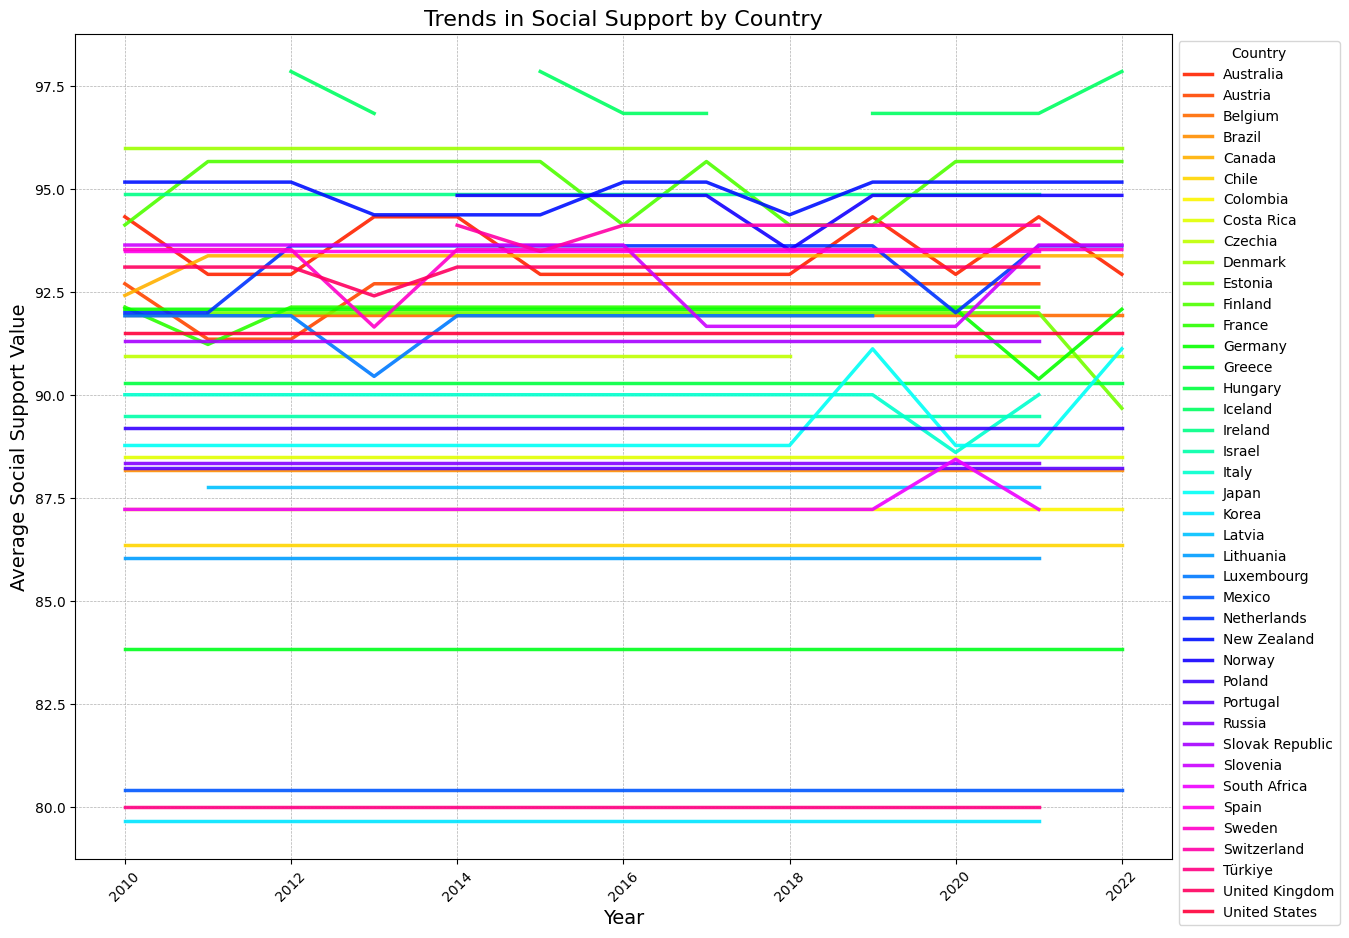

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for color palettes

# Filter the data for 'Social support' indicator without applying overly restrictive filters
simple_social_support_data = data[data['Indicator'] == 'Social support']

# Check if we have data across a broad range of years and countries
simple_pivot_data = simple_social_support_data.pivot_table(values='Value', index='Time', columns='Country', aggfunc='mean')

# Define a color palette
palette = sns.color_palette('hsv', len(simple_pivot_data.columns))

# Attempt a simplified visualization of social support trends across all countries
plt.figure(figsize=(16, 10))
for i, country in enumerate(simple_pivot_data.columns):
    plt.plot(simple_pivot_data.index, simple_pivot_data[country], marker='', color=palette[i], linewidth=2.5, alpha=0.9, label=country)

plt.title('Trends in Social Support by Country', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Social Support Value', fontsize=14)
plt.xticks(rotation=45)
plt.legend(simple_pivot_data.columns, loc='upper left', bbox_to_anchor=(1, 1), title="Country")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rectangle to make space for the legend

plt.show()

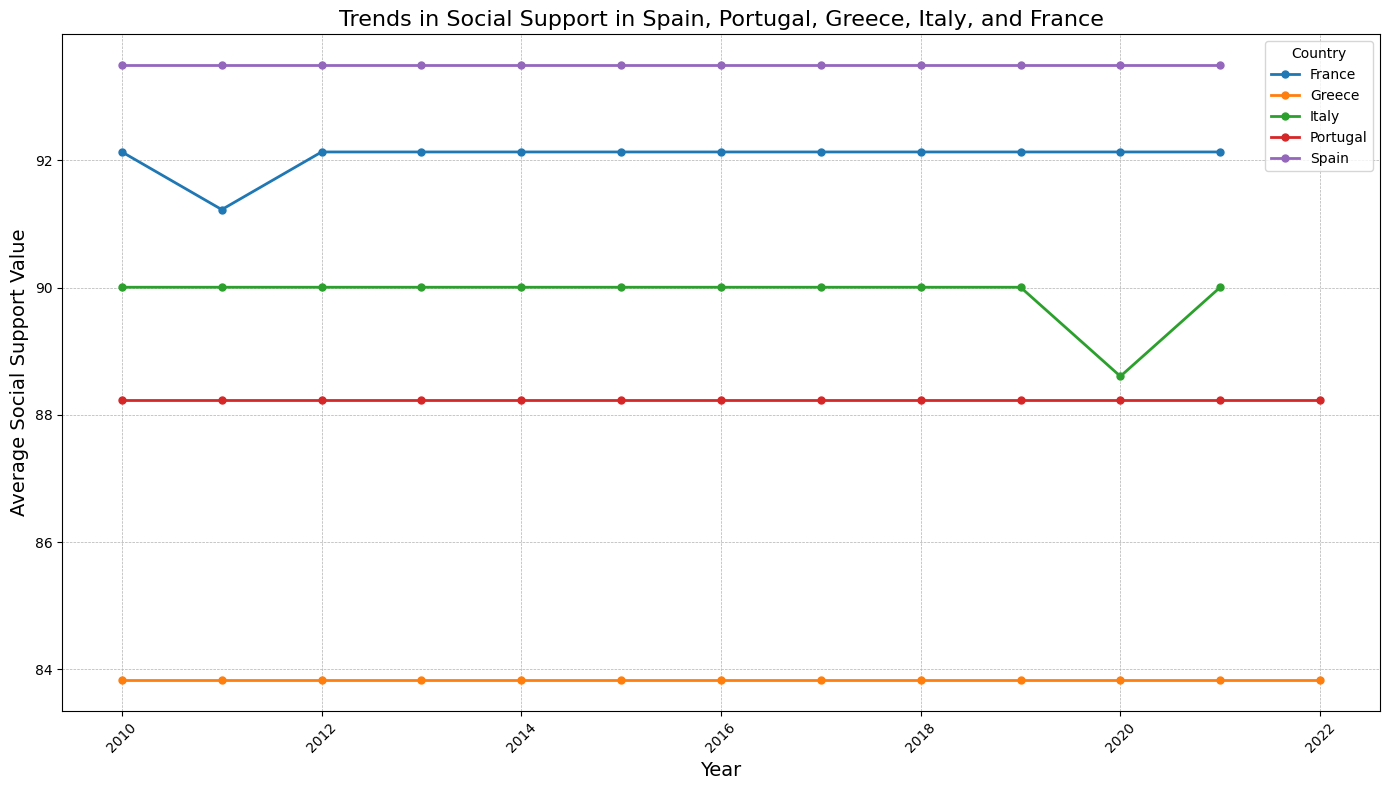

In [21]:
# Focusing on specific countries: Spain, Portugal, Greece, Italy, and France
# We'll filter the dataset for these countries and visualize the trends in social support.

# Filter for the specified countries
countries_of_interest = ['Spain', 'Portugal', 'Greece', 'Italy', 'France']
filtered_social_support_data = simple_social_support_data[simple_social_support_data['Country'].isin(countries_of_interest)]

# Pivot the filtered data for visualization
filtered_pivot_data = filtered_social_support_data.pivot_table(values='Value', index='Time', columns='Country', aggfunc='mean')

# Visualization
plt.figure(figsize=(14, 8))
for i, country in enumerate(filtered_pivot_data.columns):
    plt.plot(filtered_pivot_data.index, filtered_pivot_data[country], marker='o', linestyle='-', linewidth=2, markersize=5, label=country)

plt.title('Trends in Social Support in Spain, Portugal, Greece, Italy, and France', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Social Support Value', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Country")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()